# Random Forest

## Name : Wei Hsuan Tsui 

**TO-DO**

Follow the steps to answer the task on Vendoe quiz document, train a machine learning model using the Random Forest algorithm on the dataset sensor.xlsx with Python library Scikit-Learn.This machine learning project includes the following 

steps:

1.Load the data

2.Preprocess the dataset

3.Perform the exploratory data analysis (EDA) on the dataset 

4.Split the input/output arrays into the training/testing datasets

5.Build and train the model

6.Score the accuracy of the mode

7.Predict the outcome of records
    
8.Evaluate the model using the 10-fold cross-validationtechnique.

In [1]:
#-----Import standard libraries
import pandas as pd
import numpy as np
import sklearn

#----Import libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#Import scit-learn module for the algorithm/model: RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Import scit-Learn module to split the dataset into train/test sub-datasets
from sklearn.model_selection import train_test_split

#Import scit-learn module for K-fold cross-validation -algorithm/model evaluation $ validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import scit-Learn module for classification report
from sklearn.metrics import classification_report

In [72]:
#------LOAD DATASET
# Specify what and where is the data file
filename= 'Sensor_Train_Dis.xlsx'
Final_predict= 'Sensor.test.xlsx'
df = pd.read_excel(filename)
df1= pd.read_excel(Final_predict)

# Load the data into a Pandas DataFrame df
desired_factors=['Total_R','Pre','PL','CR','PF','REF','N']
train_data= df[desired_factors]
test_data= df1[desired_factors]
target=df.Num_Indicator
target1=df1.Num_Indicator




In [3]:
#normalized_range = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))
#train_data= normalized_range.fit_transform (train_data)
#test_data= normalized_range.fit_transform (test_data)

In [73]:
#get the dimensions or shape of the dataset
# i.e. number of records/rows x number of variables/columns
print(df.shape)

(9792, 11)


In [38]:
# Get several records/rows at the top of the dataset
# Get the first five records

print(df.head(5))

   t  Total_R  Pre  PL   CR   PF     REF     N Indicator  Num_Indicator  \
0  1    88738  611   5  4.0  4.2  829940  0.53      Good              4   
1  2    21987  721   5  4.0  0.1   69167  0.73        OK              3   
2  3      361  732  10  4.5  1.4  106554  0.95      Poor              2   
3  4    17512  264  10  4.5  9.6  241025  1.04        OK              3   
4  5    68193    8  10  4.5  9.4  737360  0.41        OK              3   

   Dissimilarity  
0      -0.191148  
1       0.379167  
2       0.413179  
3       0.038511  
4       0.459543  


In [7]:
print(df.dtypes)

t                  int64
Total_R            int64
Pre                int64
PL                 int64
CR               float64
PF               float64
REF                int64
N                float64
Indicator         object
Num_Indicator      int64
Dissimilarity    float64
dtype: object


In [82]:
# class distribution
# i.e. how many records for each class
# This dataset is a good candidate for the classification problem

print(df.groupby('Num_Indicator').size())

Num_Indicator
1     871
2    1476
3    3249
4    3868
5     336
dtype: int64


In [8]:
#------Summary Statistics
print(df.describe())

                 t       Total_R          Pre           PL           CR  \
count  9710.000000   9710.000000  9710.000000  9710.000000  9710.000000   
mean   4855.500000  50173.484140   497.022554     7.496395     4.249640   
std    2803.179891  28669.758782   287.015124     2.500126     0.250013   
min       1.000000      0.000000     0.000000     5.000000     4.000000   
25%    2428.250000  25267.000000   245.250000     5.000000     4.000000   
50%    4855.500000  50453.000000   496.000000     5.000000     4.000000   
75%    7282.750000  75090.500000   746.000000    10.000000     4.500000   
max    9710.000000  99995.000000  1000.000000    10.000000     4.500000   

                PF            REF            N  Num_Indicator  Dissimilarity  
count  9710.000000    9710.000000  9710.000000    9710.000000    9710.000000  
mean      5.056818  496012.671473     1.007235       3.138208      -0.010456  
std       2.877395  288760.332874     0.569677       1.006239       0.386180  
min     

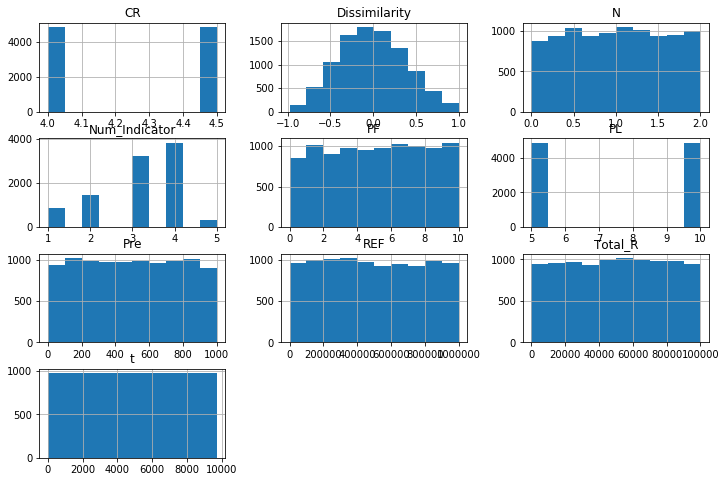

In [9]:
#------Histogram
#------To spot distribution for each variable
df.hist(figsize=(12,8))
pyplot.show()

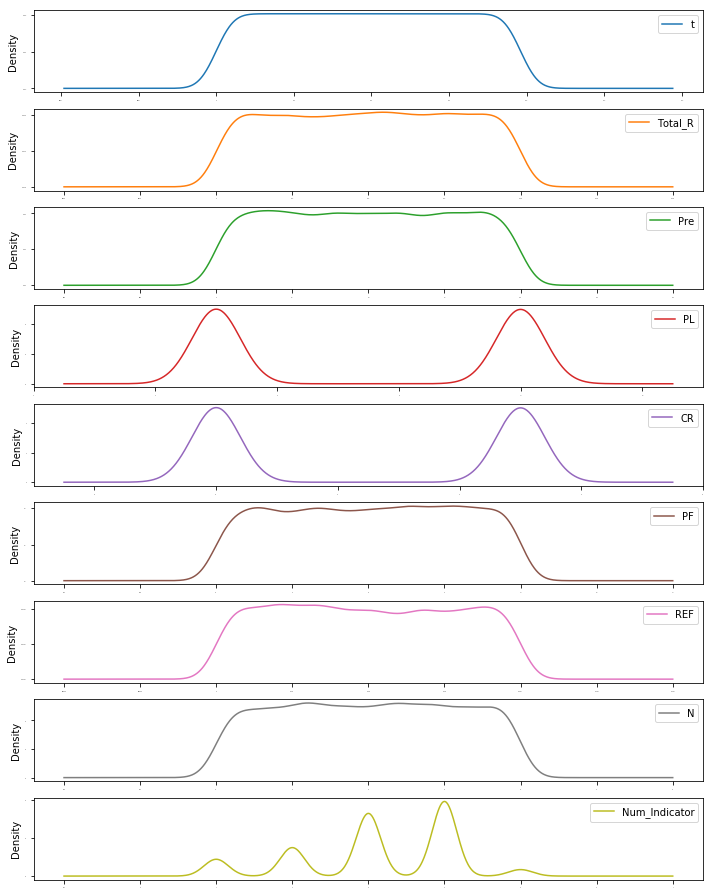

In [85]:
#------Denisty plot
#-----Another way to spot distribution, sometime it is more effective than histogram
df.plot(kind='density', subplots=True, sharex=False, legend=True, fontsize=1, figsize=(12,16))
pyplot.show()

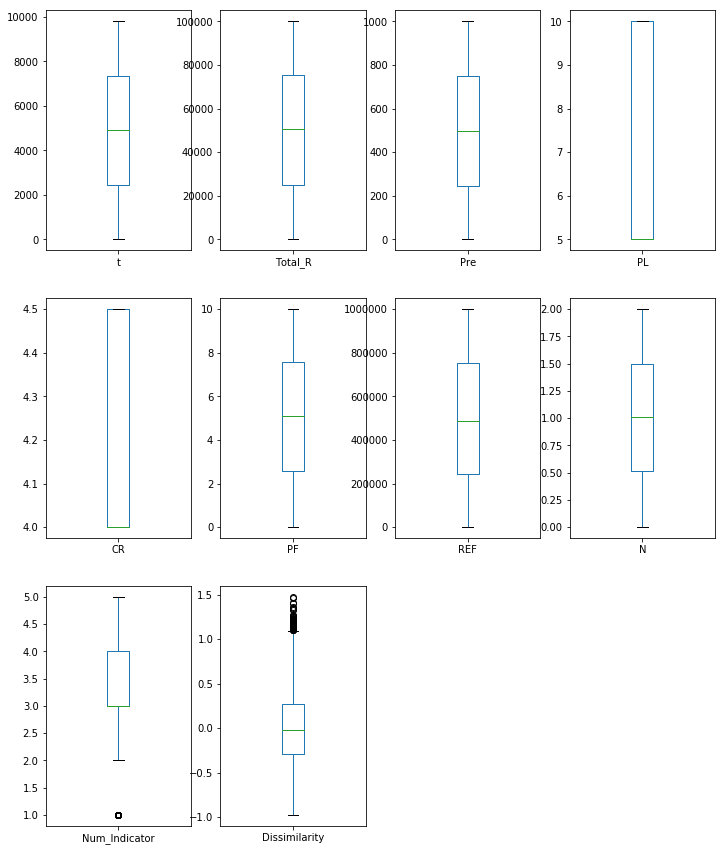

In [61]:
#------Bloxplot
#------This can be helpful to spot the outlier and skewness of each variable
df.plot(kind='box',subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(12,15))
pyplot.show()

In [39]:
#Split the dataset --> training sub-dataset 67%; test sub-dataset: 33%
test_size = 0.33
#Selection of records to include in which sub-dataset must be done randomly
#Use this seed for randomization
seed = 7
#Split the dataset (both input and output) into training/testing datasets
train_data_train, train_data_test, target_train, target_test = train_test_split(train_data,target, test_size=test_size, random_state=seed)

In [63]:

# Build the model

model = RandomForestClassifier(max_depth=9)
#Train the model using the training sub-dataset
model.fit(train_data,target)

#Print the classification report
#Ref: Section 10.2.5 Book: Machine Learning Mastery with Python
predicted = model.predict(train_data_test)

report=classification_report(target_test,predicted)



print(report)


             precision    recall  f1-score   support

          1       0.96      0.82      0.88       303
          2       0.81      0.66      0.73       453
          3       0.83      0.93      0.87      1094
          4       0.93      0.95      0.94      1277
          5       0.99      0.70      0.82       105

avg / total       0.88      0.88      0.88      3232



## Accuracy level for random forest model

In [68]:
# Score the accuracy level
result = model.score(train_data_test, target_test)

#Print out the results
print(("Accuracy:%.3f%%") % (result*100.0))


Accuracy:88.119%


In [65]:
predicted = model.predict(test_data)

print(predicted)


[4 3 3 2 3 3 2 3 4 4 3 4 4 5 4 4 4 3 4 3 4 3 4 4 4 3 4 2 3 3 4 3 3 2 4 3 4
 4 4 1 3 3 4 4 4 3 3 4 4 4 3 3 4 3 4 4 4 3 4 2 3 1 3 3 3 3 5 3 4 4 4 4 4 4
 3 3 4 3 3 3 4 4 4 3 3 5 5 3 4 3 3 4 2 3 4 2 3 4 3 4 4 4 2 4 4 3 3 3 4 4 2
 4 2 2 2 3 4 3 3 3 4 3 4 4 3 4 3 4 4 3 2 3 4 4 3 3 1 3 3 4 3 3 2 3 5 2 2 4
 2 1 3 3 3 4 4 4 3 4 3 4 4 3 4 3 4 4 3 4 4 3 4 4 2 3 3 1 3 3 3 5 4 4 3 3 1
 4 3 3 2 4 4 3 4 1 3 3 4 1 5 5]


## Prediction 1 - Random Forest 




In [67]:
model.predict([[68289,375,5,4,0.6,547617,0.45
]])

array([3], dtype=int64)

## K-fold validation - Random Forest

In [60]:
#-----Evaluate the algorithm
# specify the K-size
num_folds = 10

#Fix the random seed
#Must use the same seed value so that the same subsets can be obtained
#for each time the process is repeated
seed=7

#Split the whole data set into folds
kfold = KFold(n_splits=num_folds,random_state=seed)

#For logistic regression, we can use accuracy level to evalute the model/algorithm
scoring ='accuracy'

#Train the model and run K-fold cross validation to validate/evaluate the model
results = cross_val_score(model, train_data, target, cv=kfold, scoring=scoring)

#Print out the evaluation results
#Result: the average of all the results obtained from the k-fold cross-validation
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.770 (0.011)
